In [34]:
class Accidental():

    ## class object attributes (true for the class in general)
    islanding = 'Accidental'

    ## attributes true to a certain instance of a class
    def __init__(self,OPC,CBF11,CBF09,Tie,Load,CHP,PV,BESSs,Diesel,Contingency):
        self.OPC = OPC
        self.CBF11 = CBF11
        self.CBF09 = CBF09
        self.Tie = Tie
        self.Load = Load
        self.CHP = CHP
        self.PV = PV
        self.BESSs = BESSs
        self.Diesel = Diesel
        self.Contingency = Contingency

    ## methods
    def initialcondition(self):
        print("This scenario has the following initial condition:\ninitial operating condition = {}\nThe status of CB-F11 switch = {}\n"
              "The status of CB-F09 switch = {}\nThe status of Tie switch = {}\nThe condition of Load = {}\nThe condition of CHP generator = {}\n"
              "The condition of PV cells = {}\nThe condition of batteries = {}\nThe condition of diesel generator = {}\nThe target contingency = {} ".format(self.OPC, self.CBF11,
        self.CBF09, self.Tie, self.Load, self.CHP, self.PV, self.BESSs, self.Diesel, self.Contingency))

    def __plot__(self):
        # perform some action
        print(self.device)

In [35]:
test = Accidental(OPC = 'Normal1',CBF11 = 'Open',CBF09 = 'Open',Tie= 'Open',Load ='Max',CHP ='On',PV ='Off',BESSs ='Off',Diesel ='Off',Contingency ="CBF09" )

In [36]:
test.initialcondition()

This scenario has the following initial condition:
initial operating condition = Normal1
The status of CB-F11 switch = Open
The status of CB-F09 switch = Open
The status of Tie switch = Open
The condition of Load = Max
The condition of CHP generator = On
The condition of PV cells = Off
The condition of batteries = Off
The condition of diesel generator = Off
The target contingency = CBF09 


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

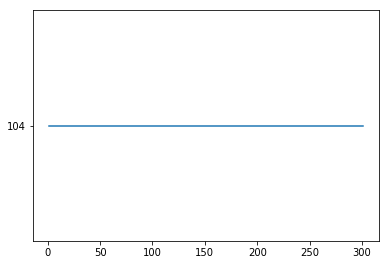

In [19]:
Fileloc = 'C:\\Users\\Saeed Mohajeryami\\Dropbox\\DOE project\\tests\\3.1 AI-1.csv'
AI1 = pd.read_csv(Fileloc)
F_11_VrmsA = AI1['1'][1:]
F_11_VangA = AI1['2'][1:]
time = pd.DataFrame(np.arange(1,len(F_11_VrmsA)+1))
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(time,F_11_VrmsA)

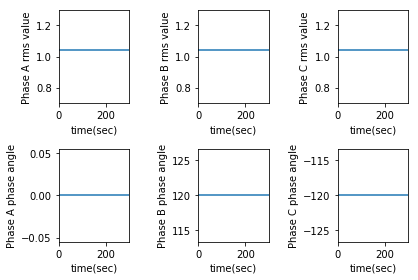

In [95]:
F_11_VrmsA = AI1['1'][1:]
F_11_VangA = AI1['2'][1:]
F_11_VrmsB = AI1['3'][1:]
F_11_VangB = AI1['4'][1:]
F_11_VrmsC = AI1['5'][1:]
F_11_VangC = AI1['6'][1:]
fig, axes=plt.subplots(nrows=2,ncols=3)

## plot Phase A rms value
axes[0,0].plot(time,F_11_VrmsA.apply(lambda x: int(x)/100))
axes[0,0].set_xlim([0,300])
axes[0,0].set_ylim([0.7,1.3])
axes[0,0].set_xlabel('time(sec)')
axes[0,0].set_ylabel('Phase A rms value')

## plot Phase A phase angle
axes[1,0].plot(time,F_11_VangA.apply(lambda x: int(x)/100))
axes[1,0].set_xlim([0,300])
axes[1,0].set_xlabel('time(sec)')
axes[1,0].set_ylabel('Phase A phase angle')

## plot Phase B rms value
axes[0,1].plot(time,F_11_VrmsB.apply(lambda x: int(x)/100))
axes[0,1].set_xlim([0,300])
axes[0,1].set_ylim([0.7,1.3])
axes[0,1].set_xlabel('time(sec)')
axes[0,1].set_ylabel('Phase B rms value')

## plot Phase B phase angle
axes[1,1].plot(time,F_11_VangB.apply(lambda x: int(x)/100))
axes[1,1].set_xlim([0,300])
axes[1,1].set_xlabel('time(sec)')
axes[1,1].set_ylabel('Phase B phase angle')

## plot Phase C rms value
axes[0,2].plot(time,F_11_VrmsC.apply(lambda x: int(x)/100))
axes[0,2].set_xlim([0,300])
axes[0,2].set_ylim([0.7,1.3])
axes[0,2].set_xlabel('time(sec)')
axes[0,2].set_ylabel('Phase C rms value')

## plot Phase C phase angle
axes[1,2].plot(time,F_11_VangC.apply(lambda x: int(x)/100))
axes[1,2].set_xlim([0,300])
axes[1,2].set_xlabel('time(sec)')
axes[1,2].set_ylabel('Phase C phase angle')


plt.tight_layout()

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the info from HR info excel file
infoloc = "C:\\Users\\Saeed Mohajeryami\\Dropbox\\DOE project\\Data from Dr\\BCM HIL PI Point List Draft 1 - 20161108.xlsx"
measurement = pd.read_excel(infoloc,sheet_name='Measurement')
status = pd.read_excel(infoloc,sheet_name='Status (feedback)')
setpoint = pd.read_excel(infoloc,sheet_name='Setpoint')
commands = pd.read_excel(infoloc,sheet_name='Commands')

In [263]:
devicelist = measurement['Measurement Name'].str.split('_',2).tolist()
hrlist = measurement['HR Number']
device = 'F'
number = 11
hr_list = []

for val in np.arange(0,len(devicelist)):
    if str(devicelist[val]) == 'nan':
        pass
    elif devicelist[val][0] == device and devicelist[val][1] == str(number):
        hr_list.append(hrlist[val])

In [268]:
devicelist[744]

['CHP', 'VrmsA']

Text(0,0.5,'CHP fuel (f^3')

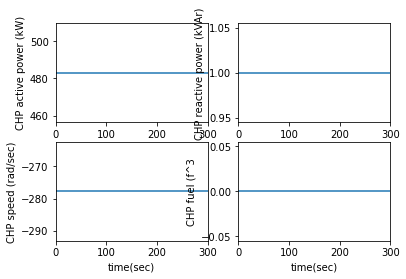

In [272]:
# plotting generation resources


## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

        # print(path)
        # read the info from HR info excel file
infoloc = "C:\\Users\\Saeed Mohajeryami\\Dropbox\\DOE project\\Data from Dr\\BCM HIL PI Point List Draft 1 - 20161108.xlsx"
measurement = pd.read_excel(infoloc, sheet_name='Measurement')
        ### read AI1 data set
Fileloc = "C:\\Users\\Saeed Mohajeryami\\Dropbox\\DOE project\\tests\\3.1 AI-1.csv"
AI1 = pd.read_csv(Fileloc)

        ## creating a dataset of desired values to be plotted
CHPP = AI1[str(730)][1:]
CHPQ = AI1[str(731)][1:]
CHPS = AI1[str(732)][1:]
CHPF = AI1[str(733)][1:]
time = pd.DataFrame(np.arange(1, len(CHPP) + 1))

        ############# plotting voltage  #############
fig, axes = plt.subplots(nrows=2, ncols=2)  ## create a subplot
        # st = fig.suptitle("F_11 Breaker Voltage", fontsize="x-large")

        ## plot CHP kW
axes[0, 0].plot(time, CHPP.apply(lambda x: int(x) / 1))
axes[0, 0].set_xlim([0, 300])
        #axes[0, 0].set_ylim([0.7, 1.3])
axes[0, 0].set_xlabel('time(sec)')
axes[0, 0].set_ylabel('CHP active power (kW)')

        ## plot CHP kVAr
axes[0, 1].plot(time, CHPQ.apply(lambda x: int(x) / 1))
axes[0, 1].set_xlim([0, 300])
axes[0, 1].set_xlabel('time(sec)')
axes[0, 1].set_ylabel('CHP reactive power (kVAr)')

        ## plot CHP Speed
axes[1, 0].plot(time, CHPS.apply(lambda x: int(x) / 100))
axes[1, 0].set_xlim([0, 300])
        #axes[0, 1].set_ylim([0.7, 1.3])
axes[1, 0].set_xlabel('time(sec)')
axes[1, 0].set_ylabel('CHP speed (rad/sec)')

        ## plot CHP fuel
axes[1, 1].plot(time, CHPF.apply(lambda x: int(x) / 100))
axes[1, 1].set_xlim([0, 300])
axes[1, 1].set_xlabel('time(sec)')
axes[1, 1].set_ylabel('CHP fuel (f^3')

In [276]:
AI1['733']
    

0      CHP_Fuel
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
         ...   
272           0
273           0
274           0
275           0
276           0
277           0
278           0
279           0
280           0
281           0
282           0
283           0
284           0
285           0
286           0
287           0
288           0
289           0
290           0
291           0
292           0
293           0
294           0
295           0
296           0
297           0
298           0
299           0
300           0
301           0
Name: 733, Length: 302, 